Solucion de la EDP por medio de solución de dos EDO ordinarias simultaneas.

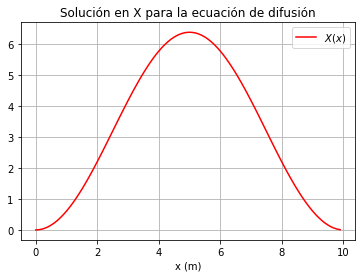

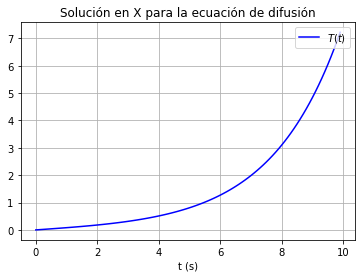

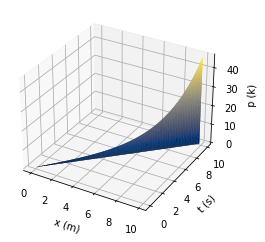

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate


def EDOx(x, y):
    '''

    :param x: parametro x en la EDO dependiente de la posicion lineal
    :param y: variables derivadas de las EDO con las que se resolvera el problema
    :return: las funciones de las EDO evaluadas en una lista de Python
    '''
    resultado = A * np.sin(omega * x)
    return [y[1], resultado]


def solucionX(x0, xLimit, y01, y02, h = 0.1):
    '''
    Funcion especializada para la solucion de la EDO compleja dependiente del tiempo y espacio
    :param x0: X inicial donde se resolvera la EDO
    :param xLimit: X de parada donde se analizara la EDO
    :param y01: la solucion para la primer funcion EDO en x=0
    :param y02: la solucion para la segunda funcion EDO en x=0
    :param h: se define como el parametro de espacio donde se evaluara la resolucion de la EDP
    :return: una lista con la solucion, la derivada de la solucion y la resolucion espacial
    '''

    resultado = integrate.solve_ivp(fun = EDOx, t_span=[x0, xLimit], y0=[y02, y01], method='RK45', t_eval = np.arange(x0, xLimit, h))\

    return [resultado.y[0], resultado.y[1], resultado.t]

#En las siguientes lineas se definen las variables para la solucion por el metodo numerico dado
omega = 2 * np.pi/10
A = 2
D = 0.5
Lx = 10
Xo = 5
l = 1.5

#Se utiliza la siguiente variable para almacenar los parametros de la solucion en x
solX = solucionX(0, 10, 0, 0)
#Las siguientes lineas de codigo funcionan para poder graficar y visualizar la solucion dada en x
plt.plot( solX[2],solX[1], 'r-', label="$X(x)$")
plt.xlabel("x (m)")
plt.grid(True)
plt.title("Solución en X para la ecuación de difusión")
plt.legend(loc='upper right')
plt.show()


def EDOt(x, y):
    '''

    :param x: parametro T en la EDO dependiente del momento t
    :param y: variables derivadas de las EDO con las que se resolvera el problema
    :return: las funciones de las EDO evaluadas en una lista de Python
    '''
    return [y[1], omega**2 * D * y[0]]

def solucionEDOt(x0, xLimit, y01, y02, h = 0.1):
    '''
    Funcion especializada para la solucion de la EDO compleja dependiente del tiempo y espacio
    :param x0: T inicial donde se resolvera la EDO
    :param xLimit: T de parada donde se analizara la EDO
    :param y01: la solucion para la primer funcion EDO en x=0
    :param y02: la solucion para la segunda funcion EDO en x=0
    :param h: se define como el parametro de espacio donde se evaluara la resolucion de la EDP
    :return: una lista con la solucion, la derivada de la solucion y la resolucion temporal
    '''
    resultado = integrate.solve_ivp(fun = EDOt, t_span=[x0, xLimit], y0=[y02, y01], method='RK45', t_eval = np.arange(x0, xLimit, h))

    return [resultado.y[0], resultado.y[1], resultado.t]


def encontrarT(x):
    '''
    Encuentra el valor numerico de la variable en p(5, 0)
    :param x: valor de x que debe ser 5
    :return: devuelve valor numerico de la solucion analitica
    '''
    x = 5
    x0 = 5
    resultado = A * np.exp(-(x-x0)/l)
    return resultado / x


def multiplicacionManual(x, y):
    '''

    :param x: lista de la solucion X para la EDP estipulada
    :param y: lista de la solucion temporal para la EDP estipulada
    :return: una lista bidimensional con la multiplicacion vectorial correspondiente
    '''
    #Definimos una lista de tipo numpy para simplificar la iteracion y multiplicacion de la misma
    resultado = np.zeros((100, 100))
    for i in range(100):
        for j in range(100):
            resultado[i][j] = x[i] * y[j]
    return resultado


# Almacena la solucion de la EDP dependiente del tiempo asi como su resolucion temporal
solT = solucionEDOt(0, 10, 0,  encontrarT(solX[1][20]))
# Siguientes lineas de codigo cumplen con la funcion de graficar la solucion dependiente del tiempo
plt.plot( solT[2],solT[1], 'b-', label="$T(t)$")
plt.xlabel("t (s)")
plt.grid(True)
plt.title("Solución en X para la ecuación de difusión")
plt.legend(loc='upper right')
plt.show()

# Encuentra la lista bidimensional de valores para la solucion de la ecuacion de calor dependiente de espacio y tiempo
Z = multiplicacionManual(solX[1], solT[1])

#Se grafican los resultados usando la libreria matplotlib la solucion bidimensional para luego comparar con la encontrada por el metodo de series de Fourier
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x (m)')
ax.set_ylabel('t (s)')
ax.set_zlabel('p (k)')
ax.plot_surface(solX[2], solT[2], Z, rstride=1, cstride=1,
                cmap='cividis', edgecolor='none')
plt.show()


Calculo de la EDP por serie de Fourier

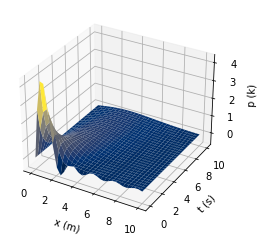

In [77]:
def Bn(L, n):
    '''

    :param L: el largo de la placa unidimensional que transmite calor
    :param n: numero de termino
    :return: Calcula el parametro bn para cada termino de la sumatoria
    '''
    lamX = lambda x: A * np.exp(-(x-Xo)**2 / l) * np.sin(n * np.pi / L)
    integral = integrate.quad(lamX, 0, L)
    resultado = integral[0] * 2 / L
    return resultado

def aproximacionUXY(numeroTerminos, x, y, L):
    '''

    :param numeroTerminos: el numero de terminos finito en los que se desea aproximar la EDP
    :param x: la lista de valores de la matriz en el espacio de x
    :param y: la lista de valores de la matriz en el espacio de y
    :param L: el valor de la arista de la grafica de la funcion
    :return: una matriz de valores que dependen de el espacio bidimensional seleccionado
    '''
    resultado = 0
    #Define la sumatoria
    for termino in range(1, numeroTerminos+1):
        bn = Bn(L, termino)
        resultado += bn * np.sin(termino * np.pi * x / L) * np.exp( -termino**2 * np.pi**2 * D * y / L**2)
    return resultado

#Se define la dimension y el numero de terminos a escoger
dimension = 30
numeroTerminos = 10
#Una lista para X y Y con puntos definidos entre 0 y L para la cantidad que se requiera
x = np.linspace(0, Lx, dimension)
y = np.linspace(0, Lx, dimension)
#Convertimos las listas en una matriz para graficar y luego se guardan estos puntos en las siguientes variables
X, Y = np.meshgrid(x, y)
#Se almacena el voltaje de la placa en la variable de "altura", Z
Z = aproximacionUXY(numeroTerminos, X, Y, Lx)

#Se grafican los resultados usando la libreria matplotlib
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x (m)')
ax.set_ylabel('t (s)')
ax.set_zlabel('p (k)')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='cividis', edgecolor='none')
plt.show()